In [1]:
# from __future__ import print_function, division

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [3]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [4]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

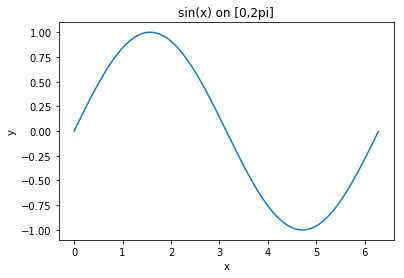

In [19]:
# TODO write code here to setup arrays x and y = sin(x) and then plot them by calling plot_fn
x = np.arange(0,2*np.pi,0.01)
y = np.sin(x)
plot_fn(x,y,'sin(x) on [0,2pi]')

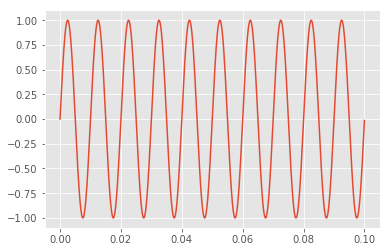

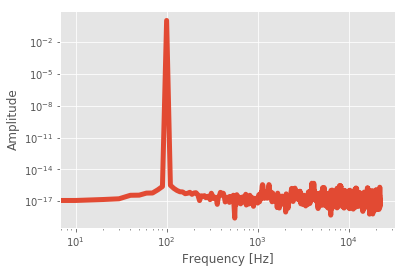

In [21]:
# sampling a sine wave programmatically
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sampling information
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal

# signal information
freq = 100 # in hertz, the desired natural frequency
omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T # time vector for plotting
y = np.sin(omega*t_vec)

plt.plot(t_vec,y)
plt.show()

# fourier transform and frequency domain
#
Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=5)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

In [8]:
# TODO then integrate y 
integrate(y,0.01)

-1.0853464615831545e-05

In [9]:
# TODO now use a np function to integrate y and compare
np.trapz(y,x,0.01)

5.073044348824496e-06

In [10]:
a = np.array([[1,2,3,4],[1,2,3,4]])

for col in np.transpose(a):
    print(col)


[1 1]
[2 2]
[3 3]
[4 4]


In [11]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
x2 = np.arange(0,6*np.pi,0.01)
y2 = np.sin(x2)
dy2dx = np.diff(y2)
slopesign = np.sign(dy2dx)
extrema = np.array([x2[1:-1],np.sign(np.diff(slopesign))])
maxima = []
minima = []
for x_value, y_value in np.transpose(extrema):
    if(np.sign(y_value) == 1):
        minima.append(x_value)
    if(np.sign(y_value) == -1):
        maxima.append(x_value)

print(maxima)
print(minima)

[1.57, 7.8500000000000005, 14.14]
[4.71, 11.0, 17.28]


# Part 2

In [12]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [13]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [33]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # TODO edit this function
    y_fft = np.fft.rfft(y_values)
    
    low_pass_filter = np.ones(y_fft.shape) # build low pass filter for Fourier function
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
    
    
    y_clean_fft = y_fft*low_pass_filter
    y_clean_values = np.fft.irfft(y_clean_fft)
    
    return y_clean_values

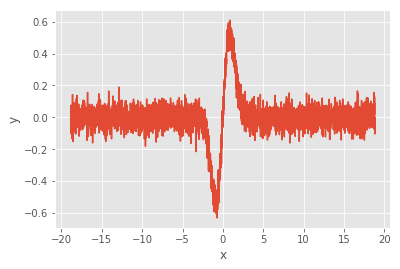

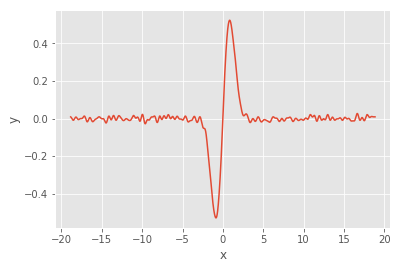

In [39]:
# TODO call noisy_packet() to get a Gaussian wave packet, 
# call clean_data() to apply a low pass filter to the data, and
# finally plot the result using plot_fn
k=1
sig=1
amp=0.05

x = np.arange(-6*np.pi,6*np.pi,0.01)
noise_packet = noisy_packet(x,k,sig,amp)
plot_fn(x,noise_packet)
clean_packet = clean_data(x,noise_packet)
plot_fn(x,clean_packet)

# Part 3

In [16]:
# TODO mask the arrays, then plot

In [17]:
# TODO try to generate masked noisy data and then clean it